# A rigorous, thorough, and high quality determination of phase transition existence and critical temperature in the 2D Ising Model

Determine the phase transition exists:
1. Mag vs. Temp
2. Sus. vs. Temp
3. Heat cap vs. Temp
4. Autocorrelation vs. Temp

Determine that the data we are taking is independent:
1. Autocorrelation as a func of lag time
2. Mag/sus/heat time series data
3. ?

Calculate critical temperature:
1. Binder cumulant
2. Finite scaling techniques??????
3. autocor?????

Do these things for various lattice sizes (can I extrapolate to infinite lattice size?). Also think about error bars/uncertainty for each method and lattice size

### Imports

In [185]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
import json
import copy
from scipy.optimize import curve_fit
import math
from scipy import fft

### Lattice Algorithms

In [186]:
def initLattice(latticeSize: int, hot: bool) -> list[list[int]]:
    lattice = np.zeros((latticeSize, latticeSize))
    if hot:
        for i in range(latticeSize):
            for j in range(latticeSize):
                #pick a random spin
                spin = 0
                randomInt = random.randint(0,1)
                if(randomInt == 1):
                    spin = 1
                else:
                    spin = -1
                #set lattice site equal to the random spin    
                lattice[i][j] = spin
    else: #lattice is cold
        for i in range(latticeSize):
            for j in range(latticeSize):
                #set all lattice sites to spin up
                spin = 1
                lattice[i][j] = spin
    
    return lattice

In [187]:
# Calculate change in energy of lattice by flipping a single site (i,j)
def deltaU(i: int, j: int, lattice: list) -> float:
    '''
    This calulation requires considering neighboring sites (first term in Hamiltonian)
    Therefore, we will use periodic boundary conditions (torus)
    I would like to imlement the external field term so you can drive the system to specific states

    E1 = -spin(i,j)*sum(spin(neighbors)),     E2 = spin(i,j)*sum(spin(neighbors))
    Ediff = E2 - E1 = 2spin(i,j)*sum(neighbors) (if spin(i,j) is 1 (up))            <<<<< NO epsilon/J? unclear why, currently just implementing pseudocode exactly as written

    In the mean field approximation E_up = -4J*sum(spin(neighbors))/4) 

    i is vertical, j is horizontal, zero indexed
    '''

    size = len(lattice)
    # If site is in an edge, apply periodic boundary conditions
    if(i == 0):
        top = lattice[size-1,j]
    else:
        top = lattice[i-1][j]
    if(i == size-1):
        bottom = lattice[0][j]
    else:
        bottom = lattice[i+1][j]
    if(j == 0):
        left = lattice[i][size-1]
    else:
        left = lattice[i][j-1]
    if(j == size-1):
        right = lattice[i][0]
    else:
        right = lattice[i][j+1]

    #now calculate the energy difference
    Ediff = 2*lattice[i][j]*(top+bottom+left+right)
    return Ediff

In [188]:
def Metropolis(lattice, temp, iterations):
    m = []
    for iteration in range(iterations):

        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            m.append(abs(sum)) 

        i = random.randint(0,lattice[0].size-1)
        j = random.randint(0,lattice[0].size-1)
        Ediff = deltaU(i,j,lattice)
        #Metropolis to decide whether site should be flipped.
        if(Ediff <= 0):
            lattice[i][j] = -lattice[i][j] 
        else:
            #now only flip site according to Boltzmann factor
            boltzmannRandom = random.uniform(0,1)
            if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
                lattice[i][j] = -lattice[i][j]

    return m

In [189]:
def MetropolisNew(lattice, temp):
    '''
    Only peform 1 Metropolis update, taking no measurements
    '''
    i = random.randint(0,len(lattice[0])-1)
    j = random.randint(0,len(lattice[0])-1)
    Ediff = deltaU(i,j,lattice)
    #Metropolis to decide whether site should be flipped.
    if(Ediff <= 0):
        lattice[i][j] = -lattice[i][j] 
    else:
        #now only flip site according to Boltzmann factor
        boltzmannRandom = random.uniform(0,1)
        if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
            lattice[i][j] = -lattice[i][j]


**avg mag should be changed to just calculate avg mag without temp and iterations and the iterate over avg mag and temps**

In [212]:
def calcMagArr(lattice, temp, iterations):
    mArr = []
    for iteration in range(iterations):
        MetropolisNew(lattice,temp)
        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            mArr.append(abs(sum)) 
    
    return mArr

In [191]:
lattice = initLattice(12, True)
avgMag(lattice, 100, 100)

[6.0]

previous run at n=12 was 2 min 4 sec, n=24 = 2.5, 48=4.7, 64=6min58

### Observable plots
Things mentioned in the first sections go here.

0.0%
0.3%
0.5%
0.8%
1.0%
1.3%
1.5%
1.8%
2.0%
2.3%
2.5%
2.8%
3.0%
3.3%
3.5%
3.8%
4.0%
4.3%
4.5%
4.8%
5.0%
5.3%
5.5%
5.8%
6.0%
6.3%
6.5%
6.8%
7.0%
7.3%
7.5%
7.8%
8.0%
8.3%
8.5%
8.8%
9.0%
9.3%
9.5%
9.8%
10.0%
10.3%
10.5%
10.8%
11.0%
11.3%
11.5%
11.8%
12.0%
12.3%
12.5%
12.8%
13.0%
13.3%
13.5%
13.8%
14.0%
14.3%
14.5%
14.8%
15.0%
15.3%
15.5%
15.8%
16.0%
16.3%
16.5%
16.8%
17.0%
17.3%
17.5%
17.8%
18.0%
18.3%
18.5%
18.8%
19.0%
19.3%
19.5%
19.8%
20.1%
20.3%
20.6%
20.8%
21.1%
21.3%
21.6%
21.8%
22.1%
22.3%
22.6%
22.8%
23.1%
23.3%
23.6%
23.8%
24.1%
24.3%
24.6%
24.8%
25.1%
25.3%
25.6%
25.8%
26.1%
26.3%
26.6%
26.8%
27.1%
27.3%
27.6%
27.8%
28.1%
28.3%
28.6%
28.8%
29.1%
29.3%
29.6%
29.8%
30.1%
30.3%
30.6%
30.8%
31.1%
31.3%
31.6%
31.8%
32.1%
32.3%
32.6%
32.8%
33.1%
33.3%
33.6%
33.8%
34.1%
34.3%
34.6%
34.8%
35.1%
35.3%
35.6%
35.8%
36.1%
36.3%
36.6%
36.8%
37.1%
37.3%
37.6%
37.8%
38.1%
38.3%
38.6%
38.8%
39.1%
39.3%
39.6%
39.8%
40.1%
40.4%
40.6%
40.9%
41.1%
41.4%
41.6%
41.9%
42.1%
42.4%
42.6%
42.9%
43.1%
43

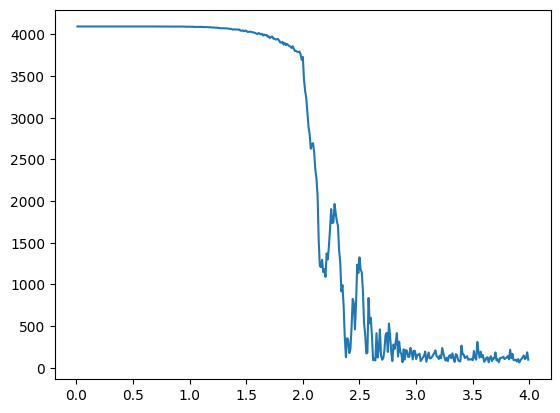

In [192]:
#Magnetization vs temperature
lattice = initLattice(64, True)
T = 100

magnetizationArray = []
numMeasurements = 10

# for measurement in np.arange(numMeasurements):
#     curMag = Metropolis(lattice, T, 500)
#     magnetizationArray.append(curMag)

# #flatten array
# magnetizationArray = np.array(magnetizationArray)
# magnetizationArray = magnetizationArray.flatten()
# magnetizationArray

# mAvg = np.average(Metropolis(lattice,T,10000))
# mAvg

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    mAvg = np.average(Metropolis(lattice,temp,100000))
    avgArr.append(mAvg)

avgArr
plt.plot(tempRange, avgArr)

0.0%
0.3%
0.5%
0.8%
1.0%
1.3%
1.5%
1.8%
2.0%
2.3%
2.5%
2.8%
3.0%
3.3%
3.5%
3.8%
4.0%
4.3%
4.5%
4.8%
5.0%
5.3%
5.5%
5.8%
6.0%
6.3%
6.5%
6.8%
7.0%
7.3%
7.5%
7.8%
8.0%
8.3%
8.5%
8.8%
9.0%
9.3%
9.5%
9.8%
10.0%
10.3%
10.5%
10.8%
11.0%
11.3%
11.5%
11.8%
12.0%
12.3%
12.5%
12.8%
13.0%
13.3%
13.5%
13.8%
14.0%
14.3%
14.5%
14.8%
15.0%
15.3%
15.5%
15.8%
16.0%
16.3%
16.5%
16.8%
17.0%
17.3%
17.5%
17.8%
18.0%
18.3%
18.5%
18.8%
19.0%
19.3%
19.5%
19.8%
20.1%
20.3%
20.6%
20.8%
21.1%
21.3%
21.6%
21.8%
22.1%
22.3%
22.6%
22.8%
23.1%
23.3%
23.6%
23.8%
24.1%
24.3%
24.6%
24.8%
25.1%
25.3%
25.6%
25.8%
26.1%
26.3%
26.6%
26.8%
27.1%
27.3%
27.6%
27.8%
28.1%
28.3%
28.6%
28.8%
29.1%
29.3%
29.6%
29.8%
30.1%
30.3%
30.6%
30.8%
31.1%
31.3%
31.6%
31.8%
32.1%
32.3%
32.6%
32.8%
33.1%
33.3%
33.6%
33.8%
34.1%
34.3%
34.6%
34.8%
35.1%
35.3%
35.6%
35.8%
36.1%
36.3%
36.6%
36.8%
37.1%
37.3%
37.6%
37.8%
38.1%
38.3%
38.6%
38.8%
39.1%
39.3%
39.6%
39.8%
40.1%
40.4%
40.6%
40.9%
41.1%
41.4%
41.6%
41.9%
42.1%
42.4%
42.6%
42.9%
43.1%
43

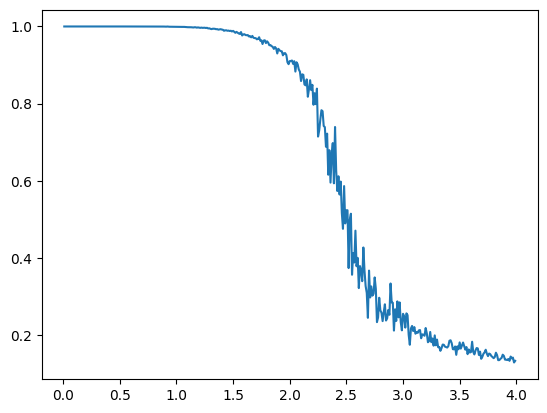

In [205]:
size = 12 #6,12,16,24,32
lattice = initLattice(size, True)

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr32 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    mAvg = 1/(np.power(size,2))*np.average(avgMag(lattice, temp, 100000))
    avgArr32.append(mAvg)

avgArr32
plt.plot(tempRange, avgArr32)

The idea is to extrapolate the pesudocrti temps from sus peaks. Collapse binder cumulant data?

Need to find v from best binder cumulant collapse. ALSOM MANUALLY CHECK BY CREATING A CORRELATION FUNCTION PLOT??

In [194]:
with open('avgArr32.txt', 'w') as filehandle:
    json.dump(avgArr32, filehandle)

In [209]:
#Binder cumulant function
def binderC(lattice, temp, iterations):
    mArr = []
    m2Arr = []
    m4Arr = []
    sum = 0
    #sum4 = 0
    for iteration in range(iterations):
        MetropolisNew(lattice,temp)
        if((iteration % 99 == 0) and (iteration != 0)):
            for xSite in range(len(lattice[0])):
                for ySite in range(len(lattice[0])):
                    sum += lattice[xSite][ySite]
                    #sum4 += np.power(lattice[xSite][ySite], 4)

        mArr.append(sum)
        #m4Arr.append(np.power(sum,4))

    # m2Avg = np.average(m2Arr)
    # m4Avg = np.average(m4Arr)
    mAvg = np.average(mArr)

    cumulant = 1 - (m4Avg)/(3*np.power(m2Avg,2))
    return cumulant


In [287]:
#Binder cumulant function
def binderCum(lattice, temp, iterations):
    m2Arr = []
    m4Arr = []
    cumArr = []
    #sum4 = 0
    for iteration in range(iterations):
        magArr = calcMagArr(lattice, temp, 100000) #already doing 10k iterations on the mag . . . and 10 on the BC call in plotting
        m2Arr = [np.power(x,2) for x in magArr]
        m4Arr = [np.power(x,4) for x in magArr]
        
        avgm2 = np.average(m2Arr)
        avgm4 = np.average(m4Arr)

        cumulant = 1 - (avgm4)/(3*np.power(avgm2,2))
        cumArr.append(cumulant)

    
    return np.average(cumArr) #IS IT CORRECT TO AVERAGE THE BINDER CUM??


In [288]:
#Magnetization vs temperature

#L=6
lattice = initLattice(6, True)

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr12 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    cumAvg = binderCum(lattice, temp, 100)
    avgArr12.append(cumAvg)


#L=24
lattice = initLattice(24, True)

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr24 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    cumAvg = binderCum(lattice, temp, 100)
    avgArr24.append(cumAvg)


plt.xlabel("$T$")
plt.ylabel("$\\frac{U_L}{U_L'}$")
plt.plot(tempRange, avgArr12)
plt.plot(tempRange, avgArr24)

0.0%


KeyboardInterrupt: 

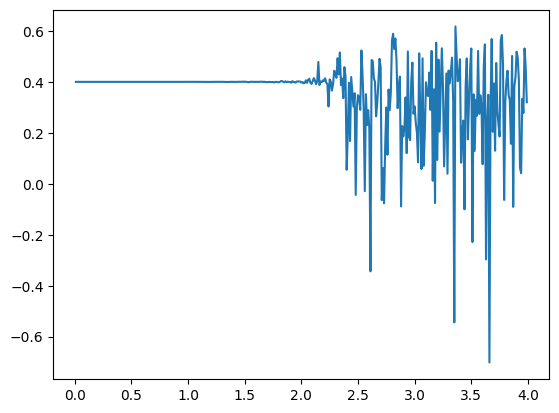

In [197]:
plt.plot(tempRange, avgArr)